In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/tanmayk/.pyenv/versions/3.9.1/envs/DAV/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Premise
\begin{equation*}
    y_n = \beta_0 + \beta_1 x_n + \epsilon_n
\end{equation*}
\begin{equation*}
    y_n = \beta^T \textbf{x}_n + \epsilon_n
\end{equation*}

In [2]:
# Generate data
N = 20
beta_0 = -4
beta_1 = 2

x = np.random.randn(N)

# Generate noise
e = np.random.randn(N)

# Generate predictions
y = beta_0 + beta_1 * x + e

# Generate true data
true_x = np.linspace(min(x), max(x), 100)
true_y = beta_0 + beta_1 * true_x

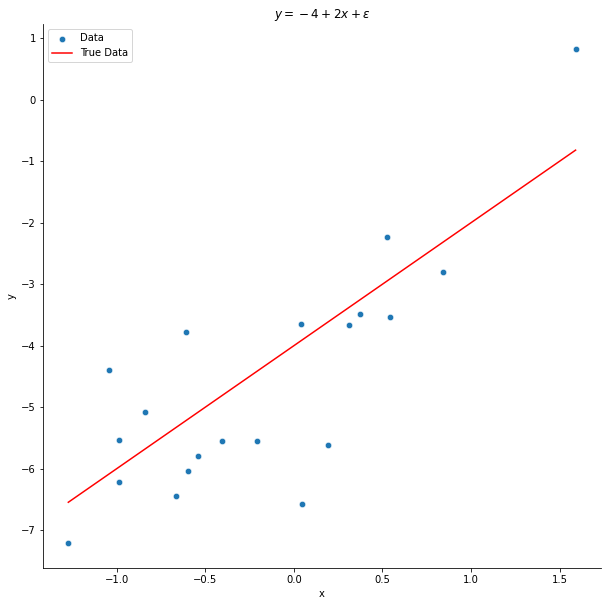

In [4]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x=x, y=y, ax=ax, s= 40, label = 'Data')
sns.lineplot(x=true_x, y=true_y, ax=ax, color='red', label = 'True Data')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title(fr"$y = {beta_0} + ${beta_1}$x + \epsilon$")
ax.legend()
sns.despine()

# Loss function - Residual sum of squares

\begin{equation*}
    \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2} \sum_{n=1}^N (y_n - \hat{y}_n)^2
\end{equation*} 
\begin{equation*}
    \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2} \sum_{n=1}^N (y_n - (\hat{\beta}_0 + \hat{\beta}_1x_n))^2
\end{equation*} 

# Parameter Estimation

## Take partial derivatives of the loss function w.r.t $\beta_0$

\begin{equation*}
    \frac{\partial \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1)}{\partial \hat{\beta}_0} = \frac{2}{2} \sum_{n=1}^N (0 - 1 - 0)(y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)
\end{equation*}
\begin{equation*}
   0 = -1 (\sum_{n=1}^N y_n - \sum_{n=1}^N \hat{\beta}_0 - \hat{\beta}_1 \sum_{n=1}^N x_n)
\end{equation*}
\begin{equation*}
   0 = \sum_{n=1}^N y_n - \hat{\beta}_0 N - \hat{\beta}_1 \sum_{n=1}^N x_n
\end{equation*}
\begin{equation*}
   \hat{\beta}_0 N = \sum_{n=1}^N y_n - \hat{\beta}_1 \sum_{n=1}^N x_n
\end{equation*}
\begin{equation*}
   \hat{\beta}_0 = \frac{1}{N} (\sum_{n=1}^N y_n - \hat{\beta}_1 \sum_{n=1}^N x_n)
\end{equation*}
\begin{equation*}
    = \bar{y} - \hat{\beta}_1 \bar{x}
\end{equation*}


## Take partial derivatives of the loss function w.r.t $\beta_1$

\begin{equation*}
    \frac{\partial \mathcal{L}(\hat{\beta}_0, \hat{\beta}_1)}{\partial \hat{\beta}_1} = \frac{2}{2} \sum_{n=1}^N (0 - 0 - x_n)(y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)
\end{equation*}
\begin{equation*}
    0 = \sum_{n=1}^N x_n y_n - (\bar{y} - \hat{\beta}_1 \bar{x}) x_n - \hat{\beta}_1x_n^2
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N x_n y_n - \bar{y}x_n + \hat{\beta}_1 \bar{x} x_n - \hat{\beta}_1x_n^2
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N (x_n y_n - \bar{y}x_n) + \sum_{n=1}^N (\hat{\beta}_1 \bar{x} x_n - \hat{\beta}_1x_n^2)
\end{equation*}
\begin{equation*}
    = \sum_{n=1}^N ( x_ny_n - \bar{y}x_n) - \hat{\beta}_1 \sum_{n=1}^N (x_n^2 - \bar{x} x_n)
\end{equation*}
\begin{equation*}
  \hat{\beta}_1 \sum_{n=1}^N (x_n^2 - \bar{x} x_n)  = \sum_{n=1}^N ( x_ny_n - \bar{y}x_n)
\end{equation*}
\begin{equation*}
  \hat{\beta}_1   = \frac{\sum_{n=1}^N ( x_ny_n - \bar{y}x_n)}{\sum_{n=1}^N (x_n^2 - \bar{x} x_n)}
\end{equation*}
\begin{equation*}
  \hat{\beta}_1   = \frac{\sum_{n=1}^N x_n(y_n - \bar{y})}{\sum_{n=1}^N x_n(x_n - \bar{x})}
\end{equation*}
\begin{equation*}
  = \frac{\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^N (x_n - \bar{x})^2}
\end{equation*}


### Summing up
\begin{equation*}
  \hat{\beta}_0  = \bar{y} - \hat{\beta}_1 \bar{x}
\end{equation*}
\begin{equation*}
 \hat{\beta}_1 = \frac{\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^N (x_n - \bar{x})^2}
\end{equation*}


In [5]:
def mean(values):
    return sum(values) / len(values)

In [6]:
def variance(values):
    mu = mean(values)
    return sum([(x - mu) ** 2 for x in values])

In [7]:
def covariance(x, y):
    mu_x = mean(x)
    mu_y = mean(y)
    return [(x - mu_x) * (y - mu_y) for x, y in zip(x, y)]

In [8]:
def estimate_coefficients(x, y):
    beta_1 = covariance(x, y) / variance(x)
    beta_0 = mean(y) - beta_1 * mean(x)
    return beta_0, beta_1